Titanic is one of the most intresting analysis project to begin with :)

In order to predict the survival chances of Titanic passengers, we’ll go through a descriptive analysis 

# Importing necassary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline


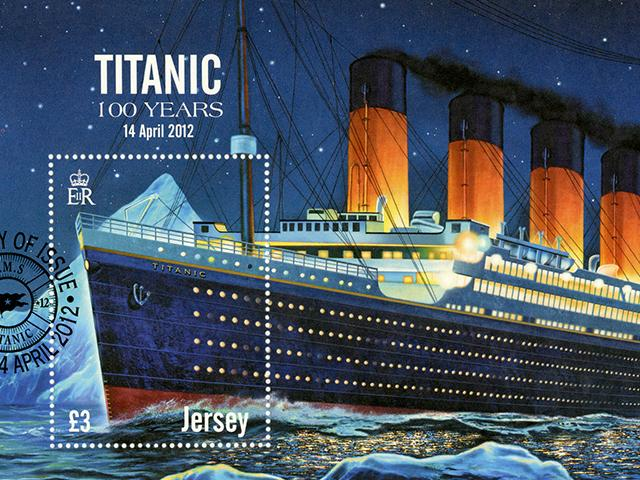

In [134]:
from IPython.display import Image
Image(filename ='titanic-ship-stamp_si.jpg',width =400,height =400)

# DataBase

In [2]:
#Loading Raw Data In Raw Form
titanic_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [6]:
print('The shape of the titanic dataset is',titanic_df.shape)

The shape of the titanic dataset is (891, 12)


In [7]:
print('The shape of the test dataset is',test_df.shape)

The shape of the test dataset is (418, 11)


# Data Quality And Missing Value Assesment

In [8]:
#Checking missing values in titanic dataset
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

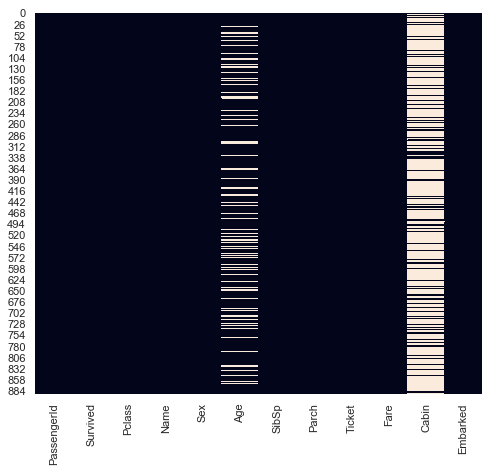

In [9]:
plt.figure(figsize=(8,7))
sns.heatmap(titanic_df.isnull(),cbar =False)

### Observation: (Heatmap)
We can observe that there are considerable missing values in the Age and Cabin columns

###   Age missing values

In [10]:
sum(titanic_df['Age'].isnull())

177

In [11]:
#proportion of age missing
round(177/len(titanic_df['PassengerId']),4)

0.1987

~20% percent of the Age data is missing

In [12]:
total = titanic_df.isnull().sum().sort_values(ascending  = False)
percent = (titanic_df.isnull().sum()/titanic_df.count()).sort_values(ascending = False)
temp = pd.concat([total, percent], axis = 1, keys = ['total','percentage'])
temp.head()

,total,percentage
Cabin,687,3.367647
Age,177,0.247899
Embarked,2,0.002250
Fare,0,0.000000
Ticket,0,0.000000


Here we notice that coloum embarked also contain 2 missing values which were not there in the heatmap.

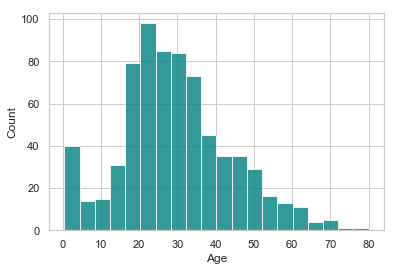

In [13]:
ax = titanic_df['Age'].hist(bins=20,color='Teal',alpha=0.8)
ax.set(xlabel='Age',ylabel='Count')
plt.show()

The Histogram is right skewed

In [14]:
titanic_df['Age'].mean()

29.69911764705882

In [20]:
#The median is 28 Where as the mean in this case is ~30
titanic_df['Age'].median(skipna=True)

28.0

### Cabin-Missing Values

In [27]:
round(687/len(titanic_df['PassengerId']),4)

0.771

In case of cabin there are almost 77% value missing so we will ignore this coloum in our analysis because it's not the right approach in any case to fill up 77% of the values

### Embarked - Missing Values

In [21]:
sum(titanic_df['Embarked'].isnull())

2

In [30]:
round(2/len(titanic_df['PassengerId']),4)

0.0022

There are only two missing values so we can IMPUTE them with the most boarded destination 

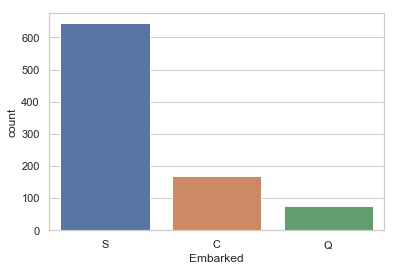

In [43]:
sns.countplot(x='Embarked',data=titanic_df)
plt.show()

The most visited destination is southhampton so we will replace those 2 NaN with "S"

References for graph creation:
https://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html 
https://seaborn.pydata.org/generated/seaborn.countplot.html



### Final Adjustment of data

Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:

1-If "Age" is missing for a given row, I'll impute with 28 (median age).

2-If "Embark" is missing for a riven row, I'll impute with "S" (the most common boarding port).

3-I'll ignore "Cabin" as a variable. There are too many missing values for imputation. Based on the information available, it appears that this value is associated with the passenger's class and fare paid.

In [50]:
final_data=titanic_df
final_data['Age'].fillna(28,inplace=True)
final_data['Embarked'].fillna("s",inplace=True)
final_data.drop('Cabin',axis=1,inplace=True)

In [51]:
final_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [85]:

final_data['TravelBuds']=final_data["SibSp"]+final_data["Parch"]
final_data['TravelAlone']=np.where(final_data['TravelBuds']>0, 0, 1)

In [89]:
final_data.drop('SibSp', axis=1, inplace=True)
final_data.drop('Parch', axis=1, inplace=True)
final_data.drop('TravelBuds', axis=1, inplace=True)

In [98]:
#Creating categorical variables for the data
train2 = pd.get_dummies(final_data, columns=["Pclass"])


train3 = pd.get_dummies(train2, columns=["Embarked"])

train4=pd.get_dummies(train3, columns=["Sex"])

train4.drop('Sex_female', axis=1, inplace=True)

train4.drop('PassengerId', axis=1, inplace=True)


train4.drop('Name', axis=1, inplace=True)

train4.drop('Ticket', axis=1, inplace=True)



train4.head(5)


,Survived,Age,Fare,Travel alone,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Embarked_s,Sex_male
0,0,22.0,7.2500,2,0,0,0,1,0,0,1,0,1
1,1,38.0,71.2833,2,0,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,1,1,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,2,0,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,1,1,0,0,1,0,0,1,0,1


In [146]:
train4_df = train4

### Test Dataset

Now, apply the same changes to the test data. 
I will apply to same imputation for "Age" in the Test data as I did for my Training data (if missing, Age = 28).

I'll also remove the "Cabin" variable from the test data, as I've decided not to include it in my analysis. 

There were no missing values in the "Embarked" port variable. 

I'll add the dummy variables to finalize the test set. 

Finally, I'll impute the 1 missing value for "Fare" with the median, 14.45.



In [147]:
test2 = pd.get_dummies(test_df, columns=["Pclass"])
test3 = pd.get_dummies(test2, columns=["Embarked"])

test4=pd.get_dummies(test3, columns=["Sex"])
test4.drop('Sex_female', axis=1, inplace=True)

test4.drop('PassengerId', axis=1, inplace=True)
test4.drop('Name', axis=1, inplace=True)
test4.drop('Ticket', axis=1, inplace=True)
train1_df = test4

In [148]:
train1_df.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


eferences for categorical variable creation:

http://pbpython.com/categorical-encoding.html 

https://chrisalbon.com/python/data_wrangling/pandas_create_column_using_conditional/

## Exploring Data Analysis

## 1)  Age category

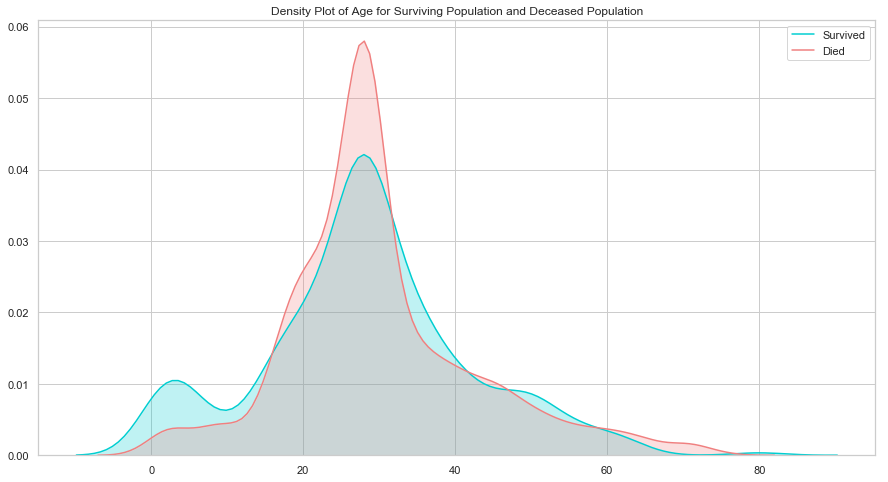

In [165]:
plt.figure(figsize=(15,8))
sns.kdeplot(titanic_df["Age"][train4_df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(titanic_df["Age"][train4_df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()

The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. The passengers evidently made an attempt to save children by giving them a place on the life rafts.

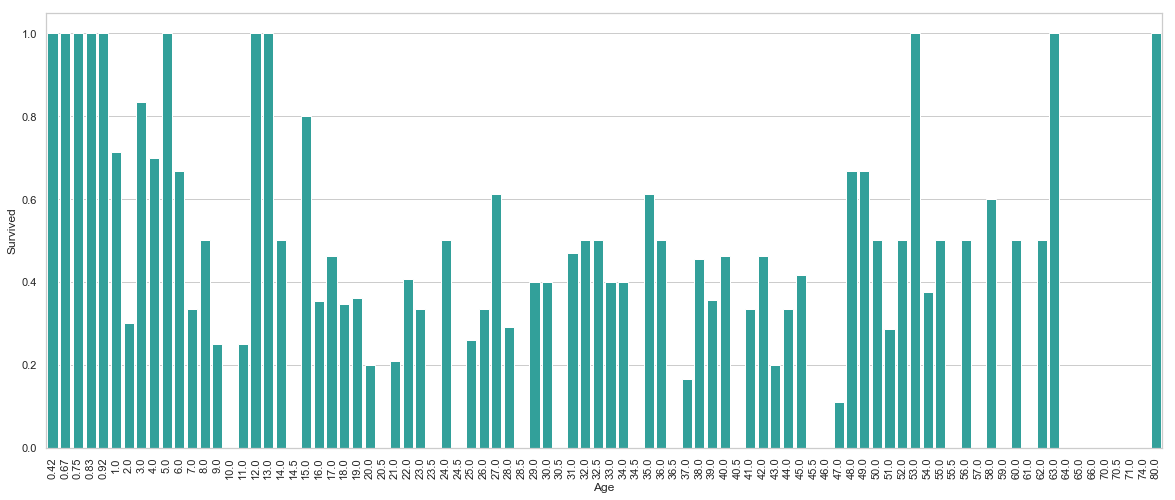

In [157]:
plt.figure(figsize=(20,8))
avg_survival_byage = train4_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
plt.show()

## Exploration For Fare

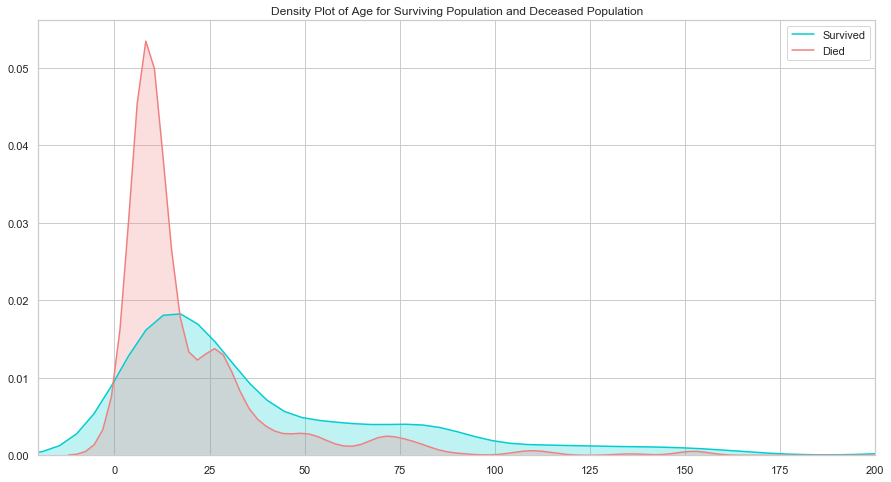

In [163]:
plt.figure(figsize=(15,8))
sns.kdeplot(titanic_df["Fare"][titanic_df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(titanic_df["Fare"][titanic_df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.xlim(-20,200)       #limit x axis to zoom on most information. there are a few outliers in fare. 
plt.show()

As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. This is probably strongly correlated with Passenger Class, which we'll look at next section.



## Exploration For Passengers Class

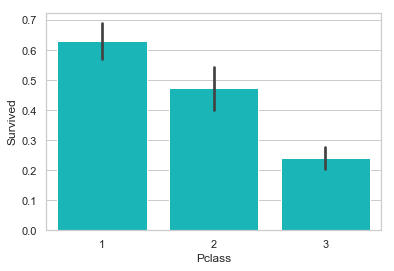

In [166]:
sns.barplot('Pclass', 'Survived', data=titanic_df, color="darkturquoise")
plt.show()

It's obvious from the plots that Class 1 passengers were the most safest

### Exploration of Embarked Port 

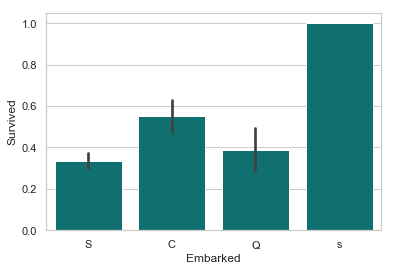

In [170]:
sns.barplot('Embarked', 'Survived', data=titanic_df, color="teal")
plt.show()

Passengers who boarded in Cherbourg, France, appear to have the highest survival rate. Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown. This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck). 
It's also worth noting the size of the whiskers in these plots. Because the number of passengers who boarded at Southhampton was highest, the confidence around the survival rate is the highest. The whisker of the Queenstown plot includes the Southhampton average, as well as the lower bound of its whisker. It's possible that Queenstown passengers were equally, or even more, ill-fated than their Southhampton counterparts.

### Exploration of Traveling Alone vs. With Family 

C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


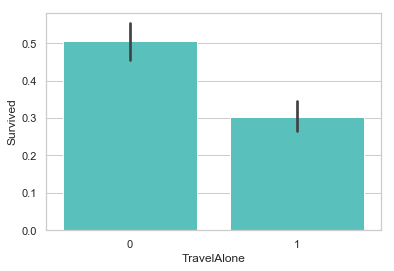

In [172]:
sns.barplot('TravelAlone', 'Survived', data=train4_df, color="mediumturquoise")
plt.show()

### Exploration of Gender Variable 

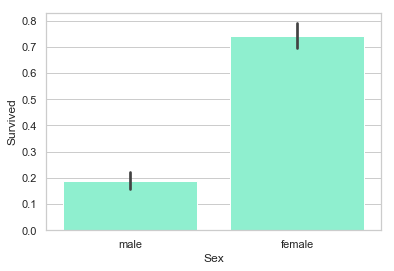

In [173]:
sns.barplot('Sex', 'Survived', data=titanic_df, color="aquamarine")
plt.show()


This is a very obvious difference. Clearly being female greatly increased your chances of survival.


References: 
https://seaborn.pydata.org/generated/seaborn.barplot.html 
    
https://seaborn.pydata.org/generated/seaborn.kdeplot.html